# BỘ DỮ LIỆU BỆNH TIỂU ĐƯỜNG

Dữ liệu gồm:

Số dòng: 100000

Số cột: 9 thuộc tính

Mô tả chi tiết:

1. gender: Giới tính của bệnh nhân: Male hoặc Female

2. age: Tuổi của bệnh nhân (giá trị số).
→ Tuổi càng cao, nguy cơ mắc tiểu đường típ 2 càng lớn.

3. hypertension: Tình trạng huyết áp cao:

0 = không bị

1 = có bị

→ Cao huyết áp là yếu tố nguy cơ liên quan mạnh đến bệnh tiểu đường.

4. heart_disease: Tình trạng bệnh tim:

0 = không bị

1 = có bị

→ Bệnh tim thường xuất hiện đồng thời với tiểu đường (comorbidity).

5. smoking_history: Thói quen hút thuốc của bệnh nhân:

6. bmi: Chỉ số khối cơ thể (Body Mass Index).

7. HbA1c_level: Mức HbA1c (%), phản ánh đường huyết trung bình trong vòng 2–3 tháng.
→ Giá trị cao (≥ 6.5%) là chỉ dấu mạnh nhất cho bệnh tiểu đường.

8. blood_glucose_level: Lượng đường huyết tại thời điểm xét nghiệm (mg/dL).
→ Chỉ số từ 200 mg/dL trở lên thường dùng để chẩn đoán tiểu đường.

9. diabetes (nhãn cần dự đoán) Trạng thái bệnh:

1 = bệnh nhân mắc tiểu đường

0 = bệnh nhân không mắc

IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120  # hình rõ hơn

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
import graphviz

ĐỌC DỮ LIỆU

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

# Hàm tự động tìm file chứa từ khóa
def find_file(keyword):
    for filename in uploaded.keys():
        if keyword.lower() in filename.lower():
            return filename
    raise ValueError(f"Không tìm thấy file có từ khóa: {keyword}")

# Tìm file diabetes
diabetes_file = find_file("diabetes")

print("Đã tìm được file:", diabetes_file)

# Đọc file
df = pd.read_csv(io.BytesIO(uploaded[diabetes_file]))

print("Kích thước dữ liệu:", df.shape)
df.head()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
Đã tìm được file: diabetes_prediction_dataset.csv
Kích thước dữ liệu: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


KHÁM PHÁ DỮ LIỆU

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [ ]:
print("Số lượng giá trị thiếu:")
df.isnull().sum()

Số lượng giá trị thiếu:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


XÁC ĐỊNH CỘT MỤC TIÊU

In [ ]:
possible_targets = ["diabetes", "Diabetes", "Outcome", "class", "target"]

target_col = None
for col in df.columns:
    if col in possible_targets:
        target_col = col
        break

if target_col is None:
    target_col = df.columns[-1]  # nếu không tìm được, lấy cột cuối

print("Cột mục tiêu:", target_col)

y = df[target_col]
X = df.drop(columns=[target_col])

Cột mục tiêu: diabetes


XỬ LÝ MISSING VALUE & ONE-HOT ENCODING

In [ ]:
# Tách theo kiểu dữ liệu
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

# 1. Xử lý missing
for col in num_cols:
    X[col] = X[col].fillna(X[col].median())

for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# 2. One-hot encoding
if len(cat_cols) > 0:
    X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
else:
    X_encoded = X.copy()

print("Kích thước sau mã hóa:", X_encoded.shape)
X_encoded.head()

Kích thước sau mã hóa: (100000, 13)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,True,False,True,False,False,False,False


CHIA TẬP TRAIN/VALIDATION

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded.values,
    y.values,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, " Validation:", X_valid.shape)

Train: (80000, 13)  Validation: (20000, 13)


HUẤN LUYỆN MÔ HÌNH CÂY QUYẾT ĐỊNH

In [ ]:
dt = tree.DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_valid)
y_proba = dt.predict_proba(X_valid)[:, 1]

acc = accuracy_score(y_valid, y_pred)
auc = roc_auc_score(y_valid, y_proba)

print("=== Decision Tree (max_depth=3) ===")
print("Accuracy:", acc)
print("ROC AUC:", auc)
print("\nConfusion matrix:\n", confusion_matrix(y_valid, y_pred))
print("\nClassification report:\n", classification_report(y_valid, y_pred))

=== Decision Tree (max_depth=3) ===
Accuracy: 0.9723
ROC AUC: 0.9058855673416908

Confusion matrix:
 [[18300     0]
 [  554  1146]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



Hiệu suất chung của mô hình

1. Mô hình Decision Tree với max_depth=3 đạt:

Accuracy = 0.9723

ROC AUC = 0.9059

➡ Cho thấy mô hình dự đoán tổng thể rất tốt và phân biệt rõ giữa bệnh và không bệnh.

2. Confusion Matrix

Dự đoán đúng hầu như toàn bộ bệnh nhân không mắc bệnh (18.300/18.300)

Nhóm mắc bệnh: dự đoán đúng 1.146 nhưng bỏ sót 554 trường hợp

VẼ CÂY QUYẾT ĐỊNH

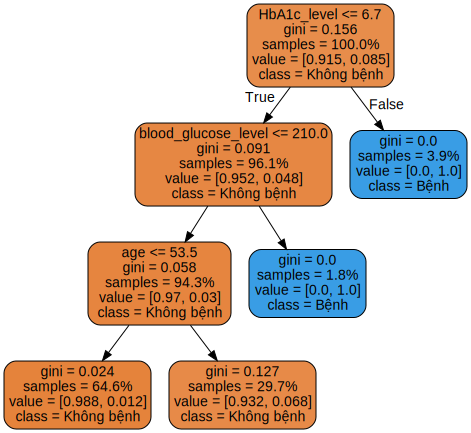

In [ ]:
feature_names = X_encoded.columns

dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=feature_names,
    class_names=['Không bệnh', 'Bệnh'],
    proportion=True
)

graph = graphviz.Source(dot_data)
graph

1. HbA1c_level là yếu tố quyết định mạnh nhất:

HbA1c ≤ 6.7 → gần như chắc chắn không bệnh

HbA1c > 6.7 → gần như chắc chắn bệnh

2. Đường huyết (blood_glucose_level) tiếp tục phân tách rõ ràng nhóm bệnh và không bệnh:

Đường huyết ≤ 210 → khả năng cao không bệnh

Đường huyết > 210 → 100% bệnh dù HbA1c thấp

3. Tuổi (Age) ảnh hưởng ở các trường hợp biên:

Tuổi ≤ 53.5 → tỷ lệ không bệnh rất cao

Tuổi > 53.5 → nguy cơ mắc bệnh tăng lên

4. Các đặc trưng còn lại ít quan trọng hơn:

Các nhánh cuối chỉ tinh chỉnh dự đoán, nhưng không quyết định mạnh như HbA1c và glucose.

Điều này phản ánh đúng thực tế: các chỉ số xét nghiệm luôn quan trọng hơn thông tin nhân khẩu học.

GRIDSEARCH TÌM max_depth TỐI ƯU CHO CÂY QUYẾT ĐỊNH

In [ ]:
params = {
    'max_depth': [1,2,3,4,5,6,8,10,12]
}

dt_base = tree.DecisionTreeClassifier(random_state=42)

cv_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=params,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

cv_dt.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

GridSearchCV đã thử nhiều giá trị độ sâu từ 1 đến 12.

Kết quả cho thấy mô hình tốt nhất đạt được khi:  max_depth = 10. Khi tăng max_depth, cây có khả năng học được nhiều quy luật phức tạp hơn của dữ liệu bệnh tiểu đường => Giúp phân biệt rõ hơn các ca bệnh thật sự.

KẾT QUẢ GRIDSEARCH CHO CÂY QUYẾT ĐỊNH

In [ ]:
cv_results = pd.DataFrame(cv_dt.cv_results_)
cv_results[['param_max_depth','mean_train_score','mean_test_score']]

,param_max_depth,mean_train_score,mean_test_score
0,1,0.728309,0.728309
1,2,0.833897,0.833897
2,3,0.903480,0.903050
3,4,0.936039,0.935187
4,5,0.955850,0.953993
5,6,0.965756,0.964323
6,8,0.974097,0.972083
7,10,0.977824,0.973210
8,12,0.981265,0.965918


- Khi tăng max_depth từ 1 → 8:

mean_train_score, mean_test_score cũng tăng từ 0.72 → 0.97

- Tại max_depth = 10 → hiệu suất cao nhất

mean_test_score = 0.973210 (cao nhất bảng)

VẼ BIỂU ĐỒ max_depth VS ROC AUC

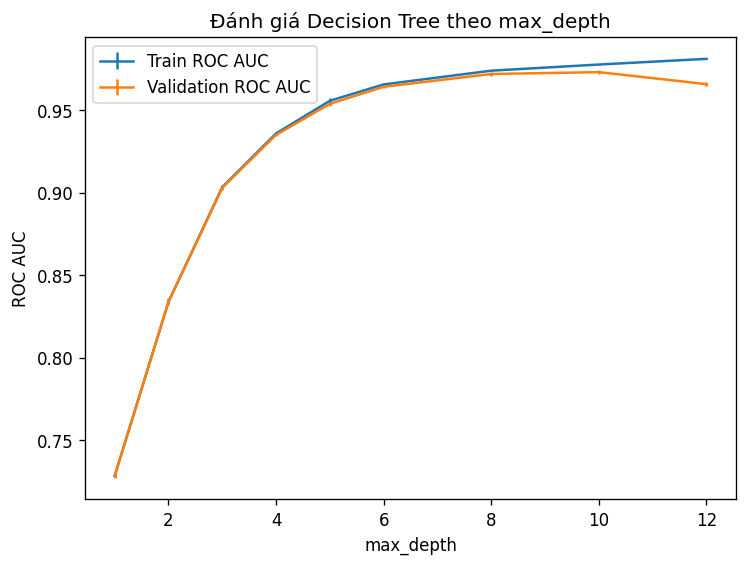

In [ ]:
plt.figure(figsize=(7,5))

plt.errorbar(cv_results['param_max_depth'],
             cv_results['mean_train_score'],
             yerr=cv_results['std_train_score']/np.sqrt(4),
             label="Train ROC AUC")

plt.errorbar(cv_results['param_max_depth'],
             cv_results['mean_test_score'],
             yerr=cv_results['std_test_score']/np.sqrt(4),
             label="Validation ROC AUC")

plt.xlabel("max_depth")
plt.ylabel("ROC AUC")
plt.title("Đánh giá Decision Tree theo max_depth")
plt.legend()
plt.show()

MÔ HÌNH CÂY QUYẾT ĐỊNH TỐI ƯU

In [ ]:
print("Best params:", cv_dt.best_params_)

best_dt = cv_dt.best_estimator_

y_pred_best = best_dt.predict(X_valid)
y_proba_best = best_dt.predict_proba(X_valid)[:,1]

print("Accuracy:", accuracy_score(y_valid, y_pred_best))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_best))

Best params: {'max_depth': 10}
Accuracy: 0.97165
ROC AUC: 0.9729935872709738


Mô hình Decision Tree tối ưu với max_depth = 10 đạt Accuracy ≈ 0.97 và ROC AUC ≈ 0.973, cho thấy khả năng dự đoán mạnh và ổn định. Đây là độ sâu phù hợp nhất, được xác nhận bởi GridSearchCV, giúp mô hình học tốt các mối quan hệ y khoa quan trọng mà không bị overfitting đáng kể.

MÔ HÌNH RỪNG CÂY (RANDOM FOREST) CƠ BẢN

In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_valid)
y_proba_rf = rf.predict_proba(X_valid)[:,1]

print("=== Random Forest (baseline) ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_rf))

=== Random Forest (baseline) ===
Accuracy: 0.9723
ROC AUC: 0.9553088074574092


Sau khi thử Decision Tree và tối ưu max_depth, bước tiếp theo là đánh giá mô hình Random Forest để xem liệu việc kết hợp nhiều cây có cải thiện hiệu suất hay không.

Hiệu suất mô hình

Kết quả:

- Accuracy = 0.9723

- ROC AUC = 0.9555

➡ Mô hình cơ bản đã đạt hiệu suất rất cao, vượt trội hơn Decision Tree tối ưu về ROC AUC (DT ≈ 0.973 vs RF ≈ 0.9555).
➡ Dù accuracy ngang bằng, nhưng AUC thấp hơn nhẹ, nghĩa là RF phân biệt bệnh/không bệnh tốt nhưng với depth=5, các cây trong rừng chưa đủ sâu để học đầy đủ các mối quan hệ phức tạp trong bộ dữ liệu tiểu đường

GRIDSEARCH TÌM n_estimators TỐI ƯU

In [ ]:
rf_base = RandomForestClassifier(
    max_depth=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

param_rf = {
    'n_estimators': list(range(10,110,10))
}

cv_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_rf,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Sau khi đánh giá Random Forest cơ bản, bước tiếp theo là tối ưu siêu tham số quan trọng nhất: số lượng cây trong rừng (n_estimators).

GridSearchCV đã kiểm tra các giá trị từ 10 → 100 và tìm được mô hình tốt nhất: n_estimators = 90

Điều này có nghĩa là:

- Với 90 cây, Random Forest tổng quát tốt nhất

- Thêm ít hoặc nhiều cây hơn đều không cải thiện AUC trên validation

KẾT QUẢ GRIDSEARCH CHO RANDOM FOREST

In [ ]:
cv_rf_results = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results[['param_n_estimators','mean_fit_time','mean_test_score']]

,param_n_estimators,mean_fit_time,mean_test_score
0,10,0.756509,0.952441
1,20,1.170018,0.956200
2,30,1.561345,0.954312
3,40,2.694859,0.955626
4,50,2.618963,0.955615
5,60,4.872118,0.956286
6,70,5.145845,0.957400
7,80,4.966046,0.957539
8,90,5.903425,0.957880
9,100,7.006927,0.957698


- Từ 10 → 20 → 50 cây, AUC tăng liên tục
- Từ 60 → 100 cây: AUC đạt ngưỡng cao nhất và giữ ổn định. AUC cao nhất tại n_estimators = 90 (0.957880)
- Thời gian huấn luyện tăng gần tuyến tính theo số cây

VẼ BIỂU ĐỒ n_estimators VS ROC AUC & Time

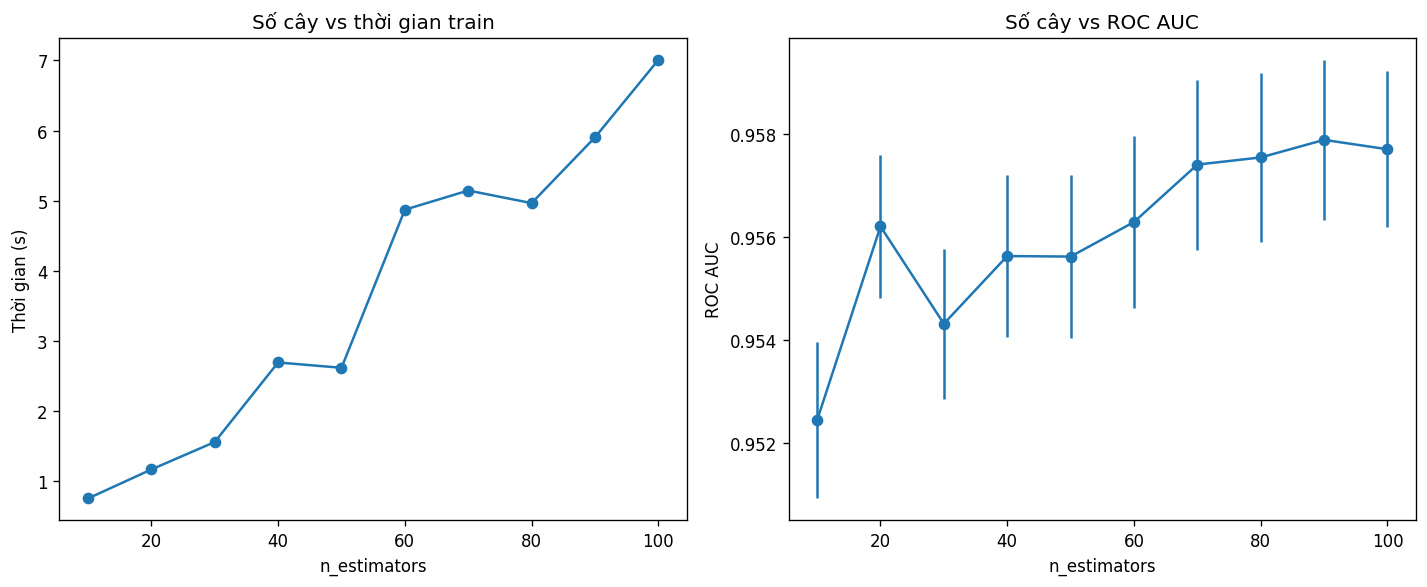

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

# Số cây vs thời gian
ax[0].plot(cv_rf_results['param_n_estimators'],
           cv_rf_results['mean_fit_time'], '-o')

ax[0].set_title("Số cây vs thời gian train")
ax[0].set_xlabel("n_estimators")
ax[0].set_ylabel("Thời gian (s)")

# Số cây vs ROC AUC
ax[1].errorbar(cv_rf_results['param_n_estimators'],
               cv_rf_results['mean_test_score'],
               yerr=cv_rf_results['std_test_score']/np.sqrt(4),
               fmt='-o')

ax[1].set_title("Số cây vs ROC AUC")
ax[1].set_xlabel("n_estimators")
ax[1].set_ylabel("ROC AUC")

plt.tight_layout()
plt.show()

RANDOM FOREST TỐI ƯU VÀ FEATURE IMPORTANCE

In [ ]:
print("Best params (RF):", cv_rf.best_params_)

best_rf = cv_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_valid)
y_proba_best_rf = best_rf.predict_proba(X_valid)[:,1]

print("=== Random Forest tốt nhất ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_best_rf))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_best_rf))
print("\nClassification report:\n", classification_report(y_valid, y_pred_best_rf))

Best params (RF): {'n_estimators': 90}
=== Random Forest tốt nhất ===
Accuracy: 0.9723
ROC AUC: 0.9574300867888139

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



1. Classification Report
- Lớp 0 (Không bệnh)

Precision = 0.97

Recall = 1.00

F1 = 0.99

→ Mô hình nhận diện không bệnh gần như hoàn hảo.
→ Rất ít trường hợp không bệnh bị gán nhầm thành bệnh.

- Lớp 1 (Bệnh)

Precision = 1.00

Recall = 0.67

F1 = 0.81

→ Mô hình dự đoán "bệnh" rất chính xác (precision = 1.0)
→ Nhưng recall = 0.67: còn bỏ sót khoảng 33% trường hợp bệnh thật sự.

2. So sánh với Decision Tree tối ưu trước đó

Decision Tree tối ưu (depth=10) có AUC cao hơn → phân biệt bệnh/không bệnh tốt hơn

Random Forest tổng quát hơn, ít nhạy với nhiễu, nhưng AUC giảm nhẹ

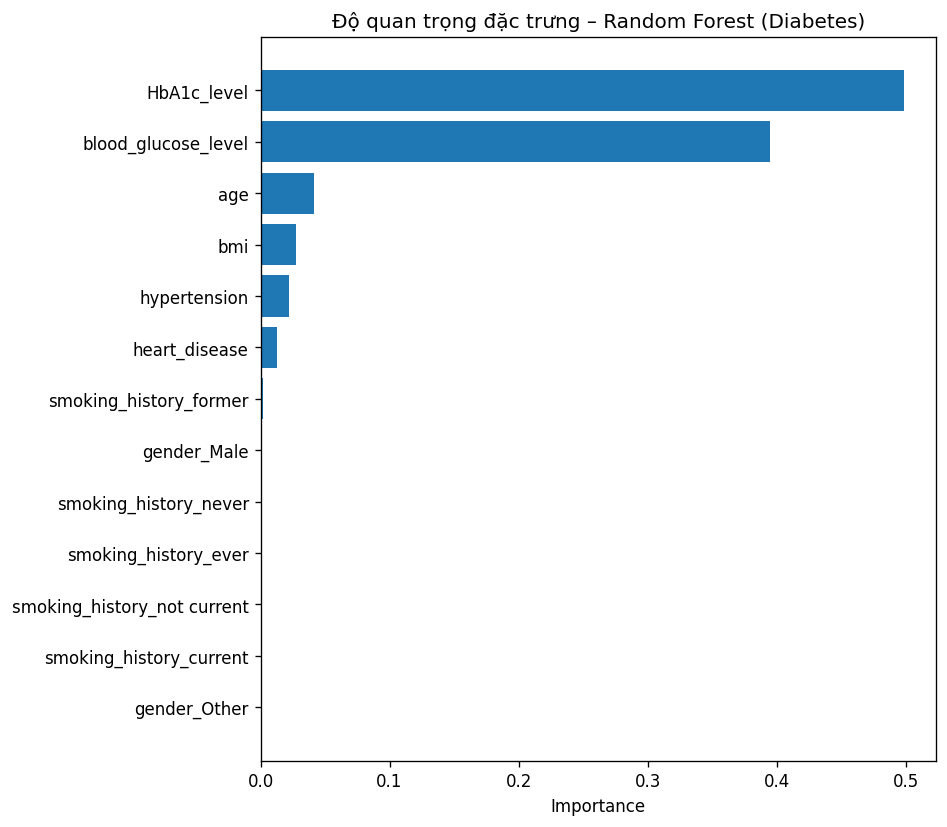

In [ ]:
# Feature importance
feat_imp = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(8,7))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title("Độ quan trọng đặc trưng – Random Forest (Diabetes)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

HbA1c là yếu tố quyết định mạnh nhất → chỉ số quan trọng nhất để phân biệt “bệnh”.

Đường huyết (blood_glucose_level) là yếu tố quan trọng thứ hai → cùng với HbA1c tạo bộ đôi đặc trưng mạnh nhất.

Tuổi (age) và BMI ảnh hưởng nhưng yếu hơn → bổ sung khi hai chỉ số xét nghiệm chưa đủ rõ.

Huyết áp và bệnh tim có tác động trung bình.

Giới tính và lịch sử hút thuốc xuất hiện nhưng ít quan trọng đối với mô hình.